In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
%%time
# read train and test prepared in the notebook data_prep_4mod
train = pd.read_csv('data/train_numfeatures.csv.gz') 
test =  pd.read_csv('data/test_numfeatures.csv.gz')

CPU times: user 58.3 s, sys: 5.73 s, total: 1min 4s
Wall time: 1min 7s


Use sales with 'date_block_num' from 12 to 32 for modeling and sales with 'date_block_num'equal 33 for validation.
To train model for prediction on test, use sales with 'date_block_num' from 12 to 33

In [3]:
lag_var = ['tg', 'tg_sum', 'tg_mean', 'tg_shop', 'tg_item', 'tg_cat']

train = train[list(set(train) - set(lag_var))]
test = test[list(set(test) - set(lag_var))]

In [ ]:
np.array(train.columns)

In [4]:
# train, trainv and valid
train = train[train['date_block_num']>11]
trainv = train[train['date_block_num']!=33]
valid = train[train['date_block_num']==33]

xgb with default hyperparameters on all features

[0]	validation_0-rmse:1.07002	validation_1-rmse:1.06356
[1]	validation_0-rmse:0.99387	validation_1-rmse:1.01056
[2]	validation_0-rmse:0.95168	validation_1-rmse:0.98420
[3]	validation_0-rmse:0.92420	validation_1-rmse:0.96644
[4]	validation_0-rmse:0.90818	validation_1-rmse:0.95936
[5]	validation_0-rmse:0.89884	validation_1-rmse:0.95497
[6]	validation_0-rmse:0.89150	validation_1-rmse:0.95295
[7]	validation_0-rmse:0.88672	validation_1-rmse:0.95159
[8]	validation_0-rmse:0.87867	validation_1-rmse:0.94105
[9]	validation_0-rmse:0.87569	validation_1-rmse:0.94093
[10]	validation_0-rmse:0.87311	validation_1-rmse:0.93972
[11]	validation_0-rmse:0.87057	validation_1-rmse:0.93850
[12]	validation_0-rmse:0.86870	validation_1-rmse:0.93797
[13]	validation_0-rmse:0.86635	validation_1-rmse:0.93646
[14]	validation_0-rmse:0.86467	validation_1-rmse:0.93608
[15]	validation_0-rmse:0.86383	validation_1-rmse:0.93588
[16]	validation_0-rmse:0.86178	validation_1-rmse:0.93511
[17]	validation_0-rmse:0.86031	validation

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

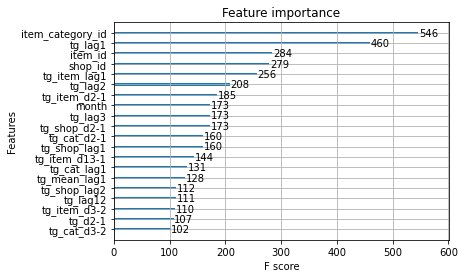

In [19]:
%%time
# Scikit-learn API (XGBRegressor) is chosen 
X_train = trainv.drop('target', axis=1)
y_train = trainv['target']
X_valid = valid.drop('target', axis=1)
y_valid = valid['target']

model = xgb.XGBRegressor()
model.fit(X_train,
          y_train, 
          eval_set=[(X_train,y_train), (X_valid, y_valid)]
        )

# plot feature importance and evaluation results
xgb.plot_importance(model, max_num_features=20);

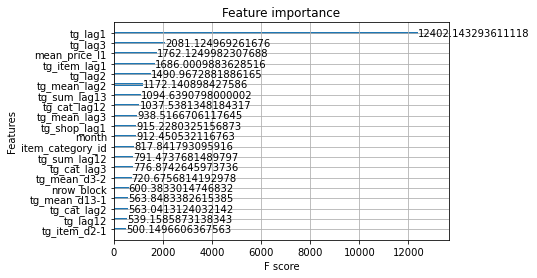

In [31]:
xgb.plot_importance(model,importance_type='gain', max_num_features=20);

In [28]:
model.importance_type

'gain'

In [26]:
feature_imp = pd.DataFrame({'features':X_train.columns, 'importance':model.feature_importances_}).sort_values('importance', ascending=False, ignore_index=True)
feature_imp

,features,importance
0,tg_lag1,0.298350
1,tg_lag3,0.050064
2,mean_price_l1,0.042390
3,tg_item_lag1,0.040559
4,tg_lag2,0.035867
5,tg_mean_lag2,0.028197
6,tg_sum_lag13,0.026333
7,tg_cat_lag12,0.024959
8,tg_mean_lag3,0.022577
9,tg_shop_lag1,0.022017


Text(0, 0.5, 'rmse')

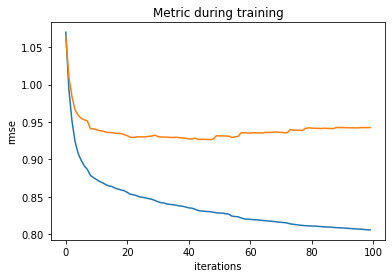

In [44]:
rmse_train = model.evals_result_['validation_0']['rmse']
rmse_valid = model.evals_result_['validation_1']['rmse']
x=[i for i in range(0,100)]
plt.plot(x,rmse_train, label='train');
plt.plot(x,rmse_valid, label='valid');
plt.title('Metric during training')
plt.xlabel('iterations')
plt.ylabel('rmse')

43 trees is optimal with default values of other hyperparameters, RMSE on valid is 0.9267

let's build a model on train and predict on test

In [5]:
%%time
X_train = train.drop('target', axis=1)
y_train = train['target']

best_xgbm = xgb.XGBRegressor(n_estimators=43)
best_xgbm.fit(X_train,
          y_train, 
          eval_set=[(X_train,y_train)]
        )

[0]	validation_0-rmse:1.06955
[1]	validation_0-rmse:0.99510
[2]	validation_0-rmse:0.95320
[3]	validation_0-rmse:0.92702
[4]	validation_0-rmse:0.91204
[5]	validation_0-rmse:0.90151
[6]	validation_0-rmse:0.89504
[7]	validation_0-rmse:0.89030
[8]	validation_0-rmse:0.88347
[9]	validation_0-rmse:0.88040
[10]	validation_0-rmse:0.87780
[11]	validation_0-rmse:0.87552
[12]	validation_0-rmse:0.87257
[13]	validation_0-rmse:0.87111
[14]	validation_0-rmse:0.86981
[15]	validation_0-rmse:0.86845
[16]	validation_0-rmse:0.86613
[17]	validation_0-rmse:0.86485
[18]	validation_0-rmse:0.86418
[19]	validation_0-rmse:0.86186
[20]	validation_0-rmse:0.85771
[21]	validation_0-rmse:0.85674
[22]	validation_0-rmse:0.85602
[23]	validation_0-rmse:0.85486
[24]	validation_0-rmse:0.85401
[25]	validation_0-rmse:0.85239
[26]	validation_0-rmse:0.84913
[27]	validation_0-rmse:0.84801
[28]	validation_0-rmse:0.84757
[29]	validation_0-rmse:0.84626
[30]	validation_0-rmse:0.84477
[31]	validation_0-rmse:0.84436
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=43, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [46]:
test_init =  pd.read_csv('data/test.csv.gz')

In [47]:
y_pred = best_xgbm.predict(test).clip(min=0, max=20)
pd.DataFrame({'ID': test_init['ID'], 'item_cnt_month': y_pred}).to_csv("submissions/xgbm.csv", index=False)


RMSE on test on private/public leaderboard is 0.953/0.947

In [66]:
# best_xgbm.save_model('models/best_xgbm')

In [67]:
# bst.load_model('models/best_xgbm')

In [68]:
# y_pred = bst.predict(xgb.DMatrix(test)).clip(min=0, max=20)

In [6]:
predontrain_xgb = best_xgbm.predict(X_train).clip(min=0, max=20)
pd.DataFrame({'xgb': predontrain_xgb}).to_csv("data/predontrain_xgb.csv", index=False)

In [7]:
print('rmse xgb:', np.sqrt(mean_squared_error(predontrain_xgb,y_train)))

rmse xgb: 0.8357605252722344
